### Importando base de dados e bibliotecas

In [1]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../Data/2004-2021.tsv', sep='\t')

### Tratamento dos dados

In [2]:
df.head()
df.info() 

'''Observações do .info()
    - colunas de Datas estão no formato 'str', mas deveriam estar no formato 'datetime'
    - as colunas abaixo estão no formato 'str', mas deveriam estar no formato 'float': 
        11 MARGEM MÉDIA REVENDA
        13 PREÇO MÉDIO DISTRIBUIÇÃO       
        14 DESVIO PADRÃO DISTRIBUIÇÃO     
        15 PREÇO MÍNIMO DISTRIBUIÇÃO       
        16 PREÇO MÁXIMO DISTRIBUIÇÃO       
        17 COEF DE VARIAÇÃO DISTRIBUIÇÃO
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

"Observações do .info()\n    - colunas de Datas estão no formato 'str', mas deveriam estar no formato 'datetime'\n    - as colunas abaixo estão no formato 'str', mas deveriam estar no formato 'float': \n        11 MARGEM MÉDIA REVENDA\n        13 PREÇO MÉDIO DISTRIBUIÇÃO       \n        14 DESVIO PADRÃO DISTRIBUIÇÃO     \n        15 PREÇO MÍNIMO DISTRIBUIÇÃO       \n        16 PREÇO MÁXIMO DISTRIBUIÇÃO       \n        17 COEF DE VARIAÇÃO DISTRIBUIÇÃO\n"

In [3]:
'''# Convertendo colunas de datas
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])


#Convertendo colunas numéricas
colunas_float = [
    'MARGEM MÉDIA REVENDA',                   # lista de colunas que precisam ser convertidas
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO'
]

for coluna in colunas_float:
    df[coluna] = (
        df[coluna]
        .astype(str)                          # garante que tudo é string
        .str.replace(',', '.', regex=False)   # troca vírgula por ponto
        .replace(['-'], np.nan)               # substitui traços por NaN
        .astype(float)                        # converte pra float
    )
    mediana = df[coluna].median()
    df[coluna] = df[coluna].fillna(mediana)   # substituindo os missing values pela mediana (menos de 5% de missing)

# Agora substituir os -99999 por mediana da própria coluna
for coluna in colunas_float:
    mediana = df.loc[df[coluna] != -99999, coluna].median()
    df[coluna] = df[coluna].replace(-99999, mediana)'''

"# Convertendo colunas de datas\ndf['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])\ndf['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])\n\n\n#Convertendo colunas numéricas\ncolunas_float = [\n    'MARGEM MÉDIA REVENDA',                   # lista de colunas que precisam ser convertidas\n    'PREÇO MÉDIO DISTRIBUIÇÃO',\n    'DESVIO PADRÃO DISTRIBUIÇÃO',\n    'PREÇO MÍNIMO DISTRIBUIÇÃO',\n    'PREÇO MÁXIMO DISTRIBUIÇÃO',\n    'COEF DE VARIAÇÃO DISTRIBUIÇÃO'\n]\n\nfor coluna in colunas_float:\n    df[coluna] = (\n        df[coluna]\n        .astype(str)                          # garante que tudo é string\n        .str.replace(',', '.', regex=False)   # troca vírgula por ponto\n        .replace(['-'], np.nan)               # substitui traços por NaN\n        .astype(float)                        # converte pra float\n    )\n    mediana = df[coluna].median()\n    df[coluna] = df[coluna].fillna(mediana)   # substituindo os missing values pela mediana (menos de 5% de missing)\n\n# Agora

In [4]:
# Convertendo colunas de datas
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])

# Convertendo colunas numéricas
colunas_float = [
    'MARGEM MÉDIA REVENDA',
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO'
]

for coluna in colunas_float:
    df[coluna] = (
        df[coluna]
        .astype(str)           # garante que é string pra fazer replace
        .str.replace(',', '.', regex=False) # troca vírgula por ponto
        .replace('-', np.nan)  # trata o traço
        .astype(float)         # converte pra float
    )

    # Substituir NaN ou -99999 pela mediana válida
    mediana = df.loc[(df[coluna].notna()) & (df[coluna] != -99999), coluna].median()

    df[coluna] = df[coluna].replace(-99999, np.nan)  # marca -99999 como NaN
    df[coluna] = df[coluna].fillna(mediana)          # substitui NaN pela mediana


In [5]:
df['PRODUTO'].value_counts()

#OBS: Produtos com diferenciação devido a escrita

PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

In [6]:
# Função para remover acentos
def remover_acentos(texto):
    if isinstance(texto, str):
        return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    return texto

# Aplicando na coluna 'PRODUTO'
df['PRODUTO'] = df['PRODUTO'].apply(remover_acentos).str.upper().str.strip()

# Conferir novamente os valores únicos
print(df['PRODUTO'].value_counts())


PRODUTO
GASOLINA COMUM        23570
GLP                   23561
OLEO DIESEL           23545
ETANOL HIDRATADO      23440
GNV                   14469
OLEO DIESEL S10       11489
GASOLINA ADITIVADA      749
Name: count, dtype: int64


### Análise Exploratória

##### Distribuição dos preços de Revenda ao longo dos anos

In [ ]:
#criando coluna ANO
df['ANO'] = df['DATA INICIAL'].dt.year

#Média anual dos preços de Revenda
precos_ano = df.groupby(['ANO', 'PRODUTO'])[['PREÇO MÉDIO REVENDA']].mean().reset_index()
precos_ano

precos_ano_sem_glp = precos_ano[precos_ano['PRODUTO'] != 'GLP'] #removendo GLP pois a unidade de medida é diferente

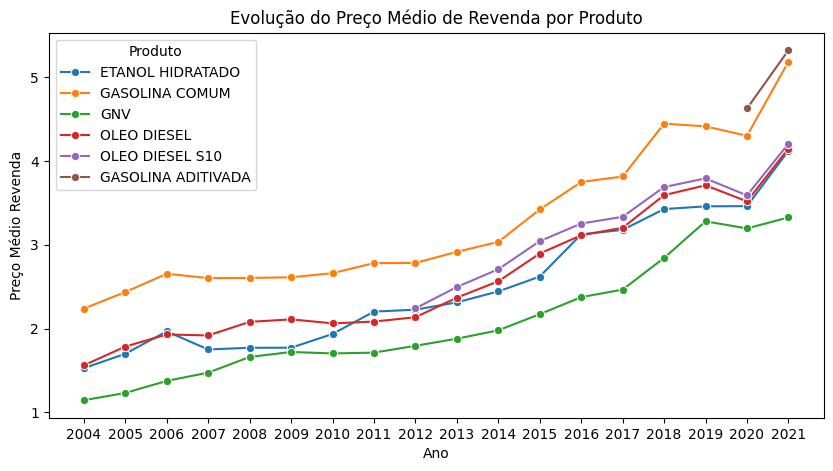

In [8]:
anos = sorted(df['ANO'].unique()) # criando variável para exibir todos os anos no eixo X

plt.figure(figsize=(10,5))
sns.lineplot(data=precos_ano_sem_glp, x='ANO', y='PREÇO MÉDIO REVENDA', hue='PRODUTO', marker='o')
plt.title('Evolução do Preço Médio de Revenda por Produto')
plt.ylabel('Preço Médio Revenda')
plt.xlabel('Ano')
plt.xticks(anos)
plt.legend(title='Produto')
plt.show()


In [ ]:
# Medidas Resumo da GASOLINA COMUM 

df_gasolina_comum = df[df['PRODUTO'] == 'GASOLINA COMUM']

df_gasolina_comum.describe()

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO
count,23570,23570,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000
mean,2012-10-12 18:51:42.995332864,2012-10-18 18:51:42.995333120,298.359610,3.195409,0.123054,2.957025,3.551107,0.411728,0.038916,2.715739,0.064424,2.580920,2.896944,0.023668,2012.285532
min,2004-05-09 00:00:00,2004-05-15 00:00:00,1.000000,1.888000,0.000000,1.390000,2.020000,0.055000,0.000000,1.633000,0.000000,1.111100,1.708000,0.000000,2004.000000
25%,2008-07-27 00:00:00,2008-08-02 00:00:00,65.000000,2.623000,0.083000,2.390000,2.899000,0.345000,0.028000,2.249000,0.045000,2.139425,2.415000,0.018000,2008.000000
50%,2012-10-14 00:00:00,2012-10-20 00:00:00,133.000000,2.874000,0.117000,2.690000,3.200000,0.395000,0.038000,2.434000,0.058000,2.303700,2.607000,0.023000,2012.000000
75%,2016-12-25 00:00:00,2016-12-31 00:00:00,332.000000,3.760750,0.156000,3.490000,4.131500,0.472000,0.048000,3.198000,0.080000,3.031950,3.380000,0.028000,2016.000000
max,2021-04-25 00:00:00,2021-05-01 00:00:00,4167.000000,6.688000,0.557000,6.670000,6.890000,1.044000,0.168000,4.660000,0.426000,4.546800,5.091000,0.126000,2021.000000
std,NaN,NaN,481.112833,0.771361,0.058592,0.745486,0.860338,0.101429,0.016797,0.648719,0.030342,0.629462,0.667199,0.009031,4.880447


In [12]:
# Medidas Resumo do ETANOL HIDRATADO

df_etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']

df_etanol.describe()

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO
count,23440,23440,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000,23440.000000
mean,2012-10-01 21:33:17.815699456,2012-10-07 21:33:17.815699712,278.384855,2.444979,0.124774,2.200253,2.813214,0.331952,0.053393,2.074564,0.097559,1.850719,2.299131,0.049767,2012.255802
min,2004-05-09 00:00:00,2004-05-15 00:00:00,1.000000,0.766000,0.000000,0.590000,1.150000,0.003000,0.000000,0.570000,0.000000,0.325700,0.766900,0.000000,2004.000000
25%,2008-07-20 00:00:00,2008-07-26 00:00:00,55.000000,1.858000,0.089000,1.650000,2.180000,0.251000,0.039000,1.579000,0.066000,1.358575,1.794400,0.031000,2008.000000
50%,2012-09-30 00:00:00,2012-10-06 00:00:00,112.000000,2.276000,0.118000,2.050000,2.610000,0.315000,0.052000,1.983000,0.085000,1.763050,2.201800,0.045000,2012.000000
75%,2016-12-11 00:00:00,2016-12-17 00:00:00,311.000000,3.017000,0.154000,2.750000,3.460000,0.391000,0.066000,2.442000,0.118000,2.292200,2.679900,0.061000,2016.000000
max,2021-04-25 00:00:00,2021-05-01 00:00:00,4111.000000,5.960000,0.607000,5.940000,6.578000,0.946000,0.212000,4.073000,0.656000,3.858100,4.692900,0.368000,2021.000000
std,NaN,NaN,483.323523,0.738083,0.056215,0.719465,0.804601,0.107827,0.023229,0.623565,0.052390,0.640035,0.631815,0.026972,4.873344


In [26]:
# Medidas Resumo Oleo Diesel

df_diesel = df[df['PRODUTO'].isin(['OLEO DIESEL', 'OLEO DIESEL S10'])]

df_diesel.describe()

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO
count,35034,35034,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000,35034.000000
mean,2014-03-11 10:35:39.407432960,2014-03-17 10:35:39.407432960,195.627619,2.786634,0.100287,2.587660,3.074318,0.316588,0.035360,2.420279,0.063870,2.292467,2.564985,0.025677,2013.698978
min,2004-05-09 00:00:00,2004-05-15 00:00:00,1.000000,1.313000,0.000000,1.020000,1.390000,0.064000,0.000000,1.180000,0.000000,0.730670,1.241000,0.000000,2004.000000
25%,2010-08-22 00:00:00,2010-08-28 00:00:00,45.000000,2.086000,0.062000,1.950000,2.299250,0.223000,0.027000,1.885000,0.037000,1.784700,1.987000,0.018000,2010.000000
50%,2014-12-07 00:00:00,2014-12-13 00:00:00,97.000000,2.773000,0.087000,2.580000,3.000000,0.308000,0.033000,2.434000,0.057000,2.292200,2.590350,0.024000,2014.000000
75%,2018-01-21 00:00:00,2018-01-27 00:00:00,216.000000,3.392000,0.129000,3.149000,3.779000,0.391000,0.042000,2.883000,0.080000,2.739200,3.048900,0.031000,2018.000000
max,2021-04-25 00:00:00,2021-05-01 00:00:00,3237.000000,5.861000,0.450000,5.840000,6.010000,1.166000,0.147000,4.478000,0.700000,4.478200,4.478200,0.267000,2021.000000
std,NaN,NaN,314.799208,0.739772,0.053120,0.694492,0.840050,0.115075,0.013908,0.603517,0.036735,0.579773,0.637231,0.011517,4.690317


#### Análise de Diferenças Regionais

In [61]:
preco_por_estado = (
    df[df['PRODUTO'].isin(['GASOLINA COMUM', 'ETANOL HIDRATADO', 'OLEO DIESEL', 'OLEO DIESEL S10'])]
    .groupby(['ESTADO', 'PRODUTO'])['PREÇO MÉDIO REVENDA']
    .mean()
    .reset_index()
)
preco_por_estado

,ESTADO,PRODUTO,PREÇO MÉDIO REVENDA
0,ACRE,ETANOL HIDRATADO,2.822432
1,ACRE,GASOLINA COMUM,3.574378
2,ACRE,OLEO DIESEL,3.062586
3,ACRE,OLEO DIESEL S10,3.825783
4,ALAGOAS,ETANOL HIDRATADO,2.485334
...,...,...,...
103,SERGIPE,OLEO DIESEL S10,3.211622
104,TOCANTINS,ETANOL HIDRATADO,2.478633
105,TOCANTINS,GASOLINA COMUM,3.324233
106,TOCANTINS,OLEO DIESEL,2.488204


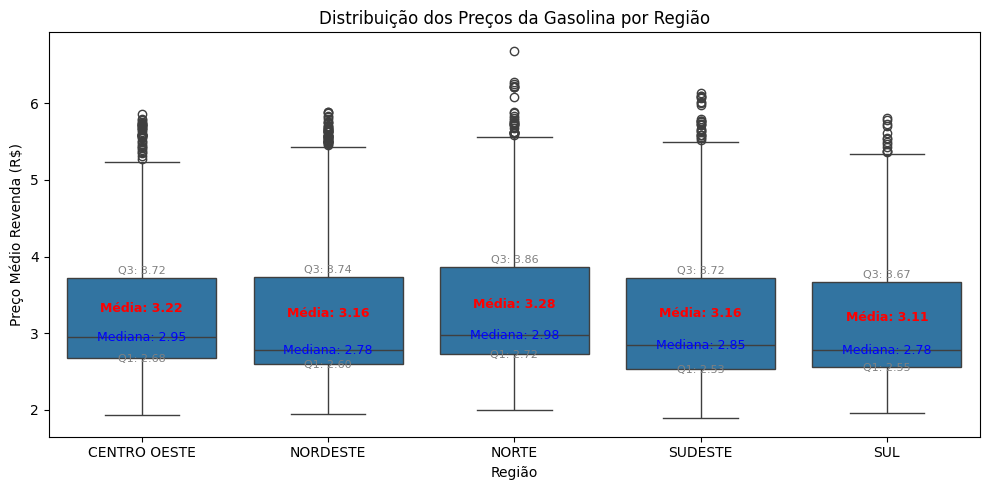

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df['PRODUTO'] == 'GASOLINA COMUM'], 
    x='REGIÃO', 
    y='PREÇO MÉDIO REVENDA'
)

# Calculando estatísticas por região
stats = df[df['PRODUTO'] == 'GASOLINA COMUM'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].agg(['mean', 'median', 'quantile'])
q1 = df[df['PRODUTO'] == 'GASOLINA COMUM'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].quantile(0.25)
q3 = df[df['PRODUTO'] == 'GASOLINA COMUM'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].quantile(0.75)
medias = df[df['PRODUTO'] == 'GASOLINA COMUM'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].mean()
medianas = df[df['PRODUTO'] == 'GASOLINA COMUM'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].median()

# Plotando valores no gráfico
for i, regiao in enumerate(medias.index):
    plt.text(i, medias[regiao] + 0.05, f'Média: {medias[regiao]:.2f}', 
             ha='center', color='red', fontsize=9, fontweight='bold')
    
    plt.text(i, medianas[regiao] - 0.05, f'Mediana: {medianas[regiao]:.2f}', 
             ha='center', color='blue', fontsize=9)

    plt.text(i, q1[regiao] - 0.05, f'Q1: {q1[regiao]:.2f}', 
             ha='center', color='gray', fontsize=8)
    
    plt.text(i, q3[regiao] + 0.05, f'Q3: {q3[regiao]:.2f}', 
             ha='center', color='gray', fontsize=8)

plt.title('Distribuição dos Preços da Gasolina por Região')
plt.xlabel('Região')
plt.ylabel('Preço Médio Revenda (R$)')
plt.tight_layout()
plt.show()


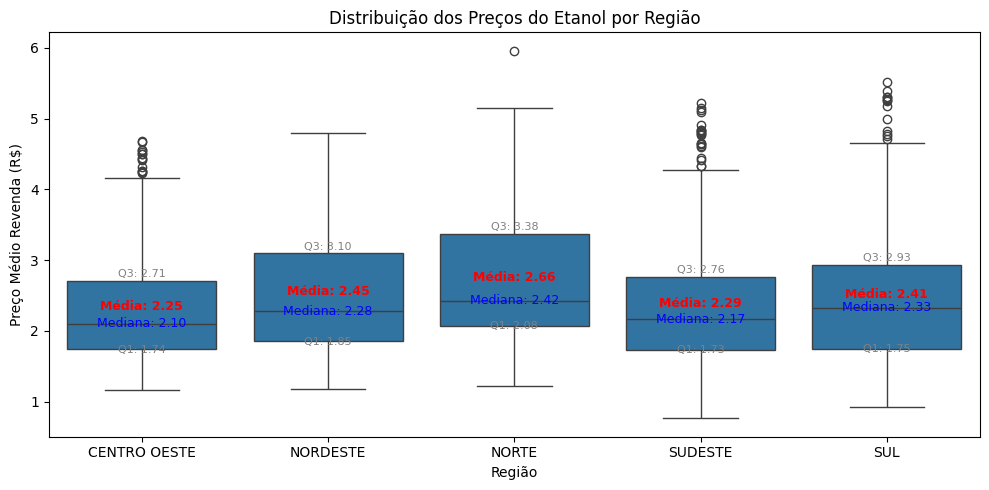

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df['PRODUTO'] == 'ETANOL HIDRATADO'], 
    x='REGIÃO', 
    y='PREÇO MÉDIO REVENDA'
)

# Calculando estatísticas por região
stats = df[df['PRODUTO'] == 'ETANOL HIDRATADO'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].agg(['mean', 'median', 'quantile'])
q1 = df[df['PRODUTO'] == 'ETANOL HIDRATADO'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].quantile(0.25)
q3 = df[df['PRODUTO'] == 'ETANOL HIDRATADO'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].quantile(0.75)
medias = df[df['PRODUTO'] == 'ETANOL HIDRATADO'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].mean()
medianas = df[df['PRODUTO'] == 'ETANOL HIDRATADO'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].median()

# Plotando valores no gráfico
for i, regiao in enumerate(medias.index):
    plt.text(i, medias[regiao] + 0.05, f'Média: {medias[regiao]:.2f}', 
             ha='center', color='red', fontsize=9, fontweight='bold')
    
    plt.text(i, medianas[regiao] - 0.05, f'Mediana: {medianas[regiao]:.2f}', 
             ha='center', color='blue', fontsize=9)

    plt.text(i, q1[regiao] - 0.05, f'Q1: {q1[regiao]:.2f}', 
             ha='center', color='gray', fontsize=8)
    
    plt.text(i, q3[regiao] + 0.05, f'Q3: {q3[regiao]:.2f}', 
             ha='center', color='gray', fontsize=8)

plt.title('Distribuição dos Preços do Etanol por Região')
plt.xlabel('Região')
plt.ylabel('Preço Médio Revenda (R$)')
plt.tight_layout()
plt.show()

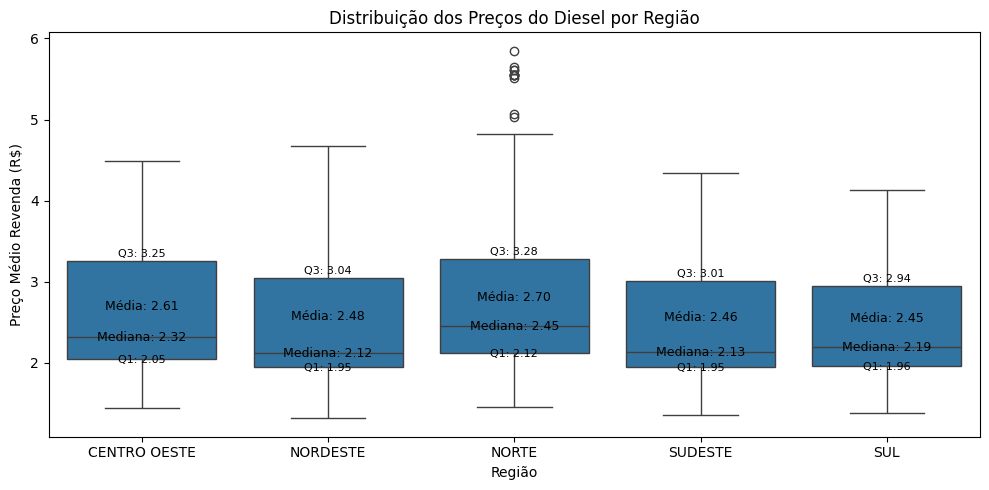

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df['PRODUTO'] == 'OLEO DIESEL'], 
    x='REGIÃO', 
    y='PREÇO MÉDIO REVENDA'
)

# Calculando estatísticas por região
stats = df[df['PRODUTO'] == 'OLEO DIESEL'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].agg(['mean', 'median', 'quantile'])
q1 = df[df['PRODUTO'] == 'OLEO DIESEL'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].quantile(0.25)
q3 = df[df['PRODUTO'] == 'OLEO DIESEL'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].quantile(0.75)
medias = df[df['PRODUTO'] == 'OLEO DIESEL'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].mean()
medianas = df[df['PRODUTO'] == 'OLEO DIESEL'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].median()

# Plotando valores no gráfico
for i, regiao in enumerate(medias.index):
    plt.text(i, medias[regiao] + 0.05, f'Média: {medias[regiao]:.2f}', 
             ha='center', color='black', fontsize=9)
    
    plt.text(i, medianas[regiao] - 0.05, f'Mediana: {medianas[regiao]:.2f}', 
             ha='center', color='black', fontsize=9)

    plt.text(i, q1[regiao] - 0.05, f'Q1: {q1[regiao]:.2f}', 
             ha='center', color='black', fontsize=8)
    
    plt.text(i, q3[regiao] + 0.05, f'Q3: {q3[regiao]:.2f}', 
             ha='center', color='black', fontsize=8)

plt.title('Distribuição dos Preços do Diesel por Região')
plt.xlabel('Região')
plt.ylabel('Preço Médio Revenda (R$)')
plt.tight_layout()
plt.show()

In [47]:
# Seleciona apenas gasolina
df_gasolina = df[df['PRODUTO'] == 'GASOLINA COMUM']

# Cria uma tabela resumo
tabela_resumo = df_gasolina.groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].agg(
    Média='mean',
    Mediana='median',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    Mínimo='min',
    Máximo='max',
    Desvio_Padrão='std'
).round(2)

tabela_resumo


,Média,Mediana,Q1,Q3,Mínimo,Máximo,Desvio_Padrão
REGIÃO,,,,,,,
CENTRO OESTE,3.22,2.95,2.68,3.72,1.94,5.86,0.74
NORDESTE,3.16,2.78,2.60,3.74,1.95,5.89,0.78
NORTE,3.28,2.98,2.72,3.86,2.00,6.69,0.75
SUDESTE,3.16,2.85,2.53,3.72,1.89,6.13,0.83
SUL,3.11,2.78,2.55,3.67,1.96,5.81,0.74


In [58]:
# Diferença entre preço médio, máximo e mínimo ao longo dos anos com diferenças absolutas e relativas
resultados = []

for periodo, grupo in df_gasolina.groupby('ANO'):
    # Dados de preço máximo
    max_preco = grupo['PREÇO MÁXIMO REVENDA'].max()
    estado_max = grupo.loc[grupo['PREÇO MÁXIMO REVENDA'] == max_preco, 'ESTADO'].values[0]

    # Dados de preço mínimo
    min_preco = grupo['PREÇO MÍNIMO REVENDA'].min()
    estado_min = grupo.loc[grupo['PREÇO MÍNIMO REVENDA'] == min_preco, 'ESTADO'].values[0]

    # Preço médio de revenda
    media = grupo['PREÇO MÉDIO REVENDA'].mean()
    
    # Calcular diferenças
    diff_abs = max_preco - min_preco
    diff_percent = round((diff_abs / min_preco) * 100, 2)


    # adicionando a lista resultados
    resultados.append({
        'ANO': periodo,
        'Preço Médio (R$)': round(media, 2),
        'Máximo (R$)': round(max_preco, 2),
        'Estado Máximo': estado_max,
        'Mínimo (R$)': round(min_preco, 2),
        'Estado Mínimo': estado_min,
        'Diferença Absoluta (R$)': round(diff_abs, 2),
        'Diferença Percentual (%)': round(diff_percent, 2)
    })

# Criar tabela final a partir da lista
tabela_diferencas = pd.DataFrame(resultados)

tabela_diferencas

,ANO,Preço Médio (R$),Máximo (R$),Estado Máximo,Mínimo (R$),Estado Mínimo,Diferença Absoluta (R$),Diferença Percentual (%)
0,2004,2.24,3.10,ACRE,1.53,SAO PAULO,1.57,102.75
1,2005,2.44,3.60,PARA,1.70,MINAS GERAIS,1.90,112.01
2,2006,2.65,3.50,ACRE,1.87,SANTA CATARINA,1.63,87.17
3,2007,2.60,3.33,ACRE,1.96,MINAS GERAIS,1.37,69.90
4,2008,2.60,3.35,RONDONIA,1.39,SAO PAULO,1.96,141.01
5,2009,2.61,3.50,PARANA,1.96,PARANA,1.54,78.30
6,2010,2.66,3.50,ACRE,1.90,MINAS GERAIS,1.60,84.31
7,2011,2.78,3.72,RIO DE JANEIRO,2.02,SAO PAULO,1.70,84.20
8,2012,2.78,3.80,RIO DE JANEIRO,2.19,SAO PAULO,1.61,73.55
9,2013,2.92,4.08,RIO DE JANEIRO,2.23,SAO PAULO,1.85,83.00
